We are solving the equation:

$L^\dagger V^\dagger = 0$

Where:

$L^\dagger = L_0^T - L_1^T\partial_z + L_2^T\partial_z^2 - L_3^T \partial_z^3 + L_4^T\partial_z^4$

Hence we have four coupled differential equations, as written up in my notes.

$L_0, L_1,$ and $L_2$ contain $\partial_x$ terms. The solution $V^\dagger$ has some z-dependence that must be periodic, and therefore can be solved with a spectral method using a Fourier basis. $V^\dagger$ also has x, dependence, s.t. $V^\dagger = u(z)\mathbb{V}^\dagger$, where $\mathbb{V}^\dagger  = [\Psi(x)^\dagger, u(x)^\dagger, A(x)^\dagger, B(x)^\dagger]^T$

Our concern for the moment is not $\mathbb{V}^\dagger$, which is bounded at $x = \pm 1$ and non-periodic, and so must be solved using Chebyshev basis functions. Instead, we are solving $u(z)$.

That is, we are saying $u(z) = u_N(z) = \sum \limits_{n=0}^N a_n \phi_n(z)$ where $\phi_n(z) = e^{i k_n z}$.

So really, we are solving: 

$L^\dagger \mathbb{V}^\dagger u(z) = 0$

The general approach for a spectral solver is to take $L u_N = R$, where R is the residual function, and then solve for the coefficients $a_n$ by minimizing R (i.e. by forcing R to be zero at a set number of points -- collocation).

Here is my confusion: 
(a) I know we are assuming separable solutions in x and z, but it still seems odd that we can just ignore x. And if we can, are we saying that $L^\dagger u(z) = 0$? That seems like a much different problem. It also means we are assuming a priori that all the fluid quantities behave the same way in the vertical extent -- that doesn't seem unreasonable, but what is the justification for that?

(b) L is a linear combination of 4x4 matrices (with differential operators) because there are 4 fluid quantities. But shouldn't the size of L be set by the number of modes in u? That is, if you choose N=3, u becomes a column vector $[u_0, u_1, u_2, u_3]^T$ where each u represents term n in the Fourier expansion?

In [1]:
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
%matplotlib inline

R, Rm, kx, ky, kz, omega, q, B0, dx, dy, dz, dt, pi, psi, u, A, B, Q, Co, psi22, psi21, psi20, u22, u21, u20, A22, A21, A20, B22, B21, B20, psi30, u30, A30, B30 = symbols("R R_m k_x k_y k_z Omega_0 q B_0 d_x d_y d_z d_t pi psi u A B Q Co psi22 psi21 psi20 u22 u21 u20 A22 A21 A20 B22 B21 B20 psi30 u30 A30 B30", real=True)
s = symbols("s",)

#Adjoint state vector matrix
VT = Matrix([psi, u, A, B])

L1 = Matrix([[0, 2, Co*dx**2, 0],
            [q - 2, 0, 0, Co],
            [1, 0, 0, 0],
            [0, 1, -q, 0]])


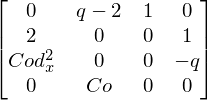

In [2]:
L1T = L1.adjoint()
L1T

In [3]:
#L3T = Matrix([[0, 0, 0, 0],
#            [0, 0, 0, 0],
#            [1/(4*pi), 0, 0, 0],
#            [0, 0, 0, 0]])
L3T = Matrix([[0, 0, 0, 0],
            [0, 0, 0, 0],
            [Co, 0, 0, 0],
            [0, 0, 0, 0]])
L3 = Matrix([[0, 0, Co, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]])

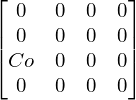

In [4]:
L3T

In [5]:
L2 = Matrix([[(2/R)*dx**2, 0, 0, 0],
             [0, 1/R, 0, 0],
             [0, 0, 1/Rm, 0],
             [0, 0, 0, 1/Rm]])

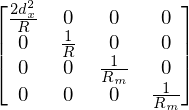

In [6]:
L2T = L2.adjoint()
L2T

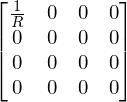

In [7]:
L4 = Matrix([[1/R, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]])
L4T = L4.adjoint()
L4T

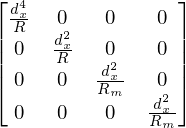

In [8]:
L0 = Matrix([[(1/R)*dx**4, 0, 0, 0],
             [0, (1/R)*dx**2, 0, 0],
             [0, 0, (1/Rm)*dx**2, 0],
             [0, 0, 0, (1/Rm)*dx**2]])
L0T = L0.adjoint()
L0T

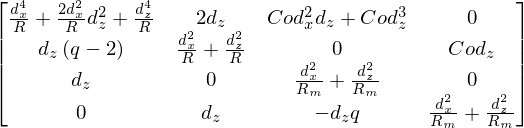

In [9]:
#dz -> 1j*Q
#LT = L0T - L1T*(1j*Q) + L2T*(1j*Q)**2 - L3T*(1j*Q)**3 + L4T*(1j*Q)**4
L = L0 + L1*dz + L2*dz**2 + L3*dz**3 + L4*dz**4
L

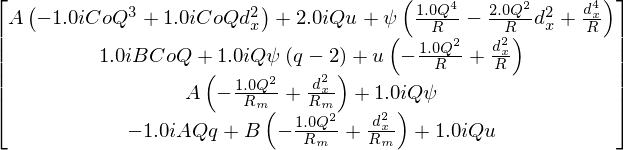

In [10]:
LT = L.adjoint()
U = Matrix([0, 0, 0, B])
(L*VT).subs(dz, 1j*Q)

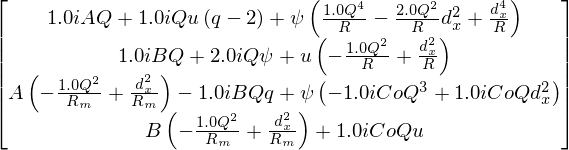

In [11]:
(LT*VT).subs(dz, 1j*Q)

In [12]:
#TESTING
LT2 = L0T - L1T*(1j*Q) + L2T*(1j*Q)**2 - L3T*(1j*Q)**3 + L4T*(1j*Q)**4

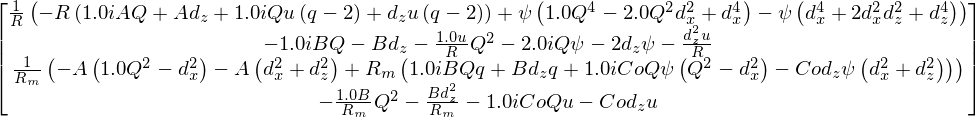

In [13]:
simplify(LT2*VT - LT*VT)

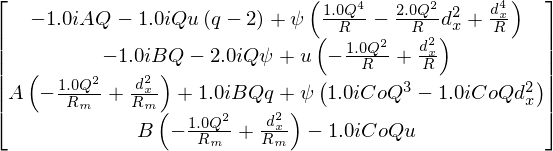

In [14]:
LT2*VT

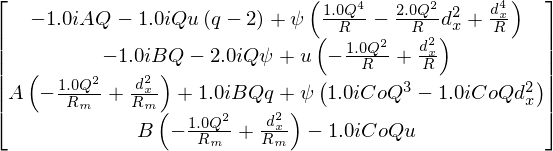

In [15]:
#This is their equation B30:
Lw = L0 - L1T*dz + L2*dz**2 - L3T*dz**3 + L4*dz**4
(Lw*VT).subs(dz, 1j*Q)

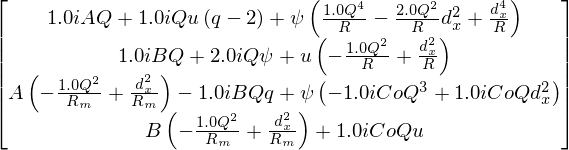

In [16]:
D = Matrix([[dx**2 + dz**2, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]])


(LT*VT).subs(dz, 1j*Q)

In [17]:
DT = D.adjoint()

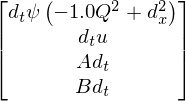

In [18]:
(DT*dt*VT).subs(dz, 1j*Q)

In [19]:
L = L0 + L1*dz + L2*dz**2 + L3*dz**3 + L4*dz**4
LT = L.adjoint()

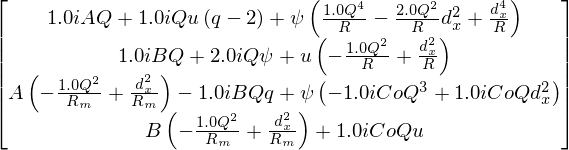

In [20]:
(LT*VT).subs(dz, 1j*Q)

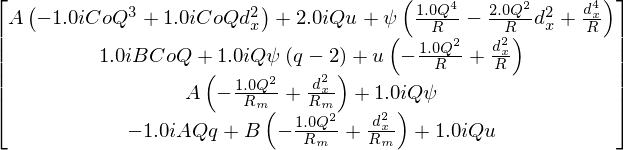

In [21]:
# non-adjoint
(L*VT).subs(dz, 1j*Q)

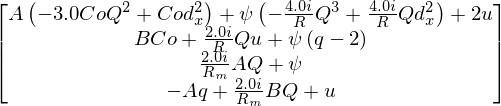

In [22]:
# L-twiddle 1:
Ltwiddle = L1 + 2*L2*dz + 3*L3*dz**2 + 4*L4*dz**3
(Ltwiddle*VT).subs(dz, 1j*Q)

In [23]:
V22 = Matrix([psi22, u22, A22, B22])
V21 = Matrix([psi21, u21, A21, B21])
V20 = Matrix([psi20, u20, A20, B20])

MM = (L*V22).subs(dz, 1j*2*Q) - (L*V21).subs(dz, 1j*Q) + (L*V20).subs(dz, 1)

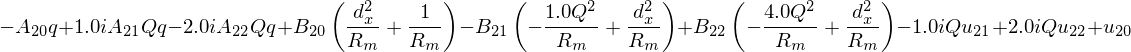

In [24]:
MM[3]

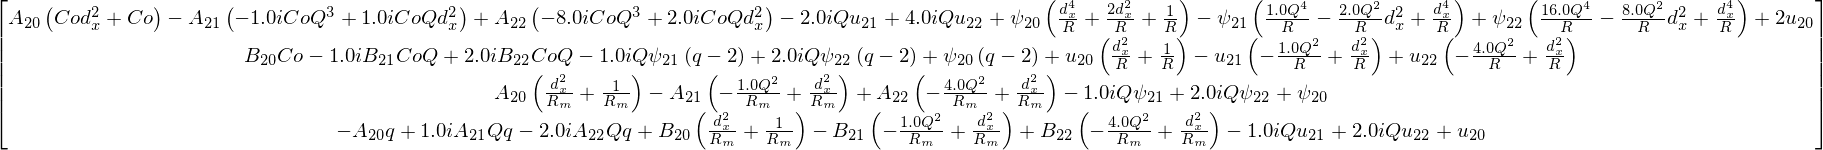

In [25]:
MM

In [26]:
((dx**2 + dz**2)*psi22).subs(dz, 1j*2*Q) - ((dx**2 + dz**2)*psi21).subs(dz, 1j*Q) + ((dx**2 + dz**2)*psi20).subs(dz, 1)


In [27]:
V20big = Matrix([psi20, u20, A20, B20, 0, 0, 0, 0, 0, 0, 0, 0])
V21big = Matrix([0, 0, 0, 0, psi21, u21, A21, B21, 0, 0, 0, 0])
V22big = Matrix([0, 0, 0, 0, 0, 0, 0, 0, psi22, u22, A22, B22])

L0big = Matrix([[(1/R)*dx**4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, (1/R)*dx**2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, (1/Rm)*dx**2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, (1/Rm)*dx**2, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, (1/R)*dx**4, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, (1/R)*dx**2, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, (1/Rm)*dx**2, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, (1/Rm)*dx**2, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, (1/R)*dx**4, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, (1/R)*dx**2, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (1/Rm)*dx**2, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (1/Rm)*dx**2]])


L1big = Matrix([[0, 2, Co*dx**2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [q - 2, 0, 0, Co, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, -q, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 2, Co*dx**2, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, q - 2, 0, 0, Co, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, -q, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, Co*dx**2, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, q - 2, 0, 0, Co],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -q, 0]])

L2big = Matrix([[(2/R)*dx**2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 1/R, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 1/Rm, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1/Rm, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, (2/R)*dx**2, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 1/R, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 1/Rm, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 1/Rm, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, (2/R)*dx**2, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/R, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/Rm, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/Rm]])

L3big = Matrix([[0, 0, Co, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, Co, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Co, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

L4big = Matrix([[1/R, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 1/R, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 1/R, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Lbig = L0big + L1big*dz + L2big*dz**2 + L3big*dz**3 + L4big*dz**4

MM = (Lbig*V22big).subs(dz, 1j*2*Q) - (Lbig*V21big).subs(dz, 1j*Q) + (Lbig*V20big).subs(dz, 0)

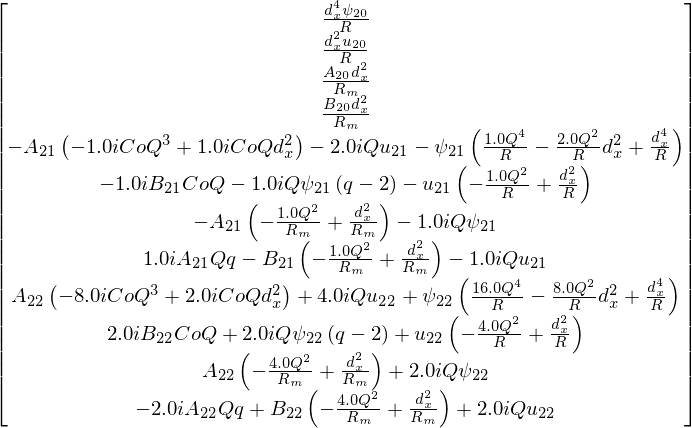

In [28]:
MM

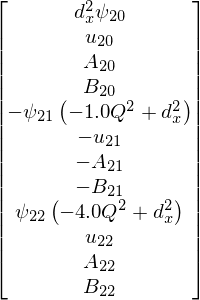

In [29]:
Dbig = Matrix([[(dx**2 + dz**2), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, (dx**2 + dz**2), 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, (dx**2 + dz**2), 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

#((dx**2 + dz**2)*psi22).subs(dz, 1j*2*Q) - ((dx**2 + dz**2)*psi21).subs(dz, 1j*Q) + ((dx**2 + dz**2)*psi20).subs(dz, 1)
(Dbig*V22big).subs(dz, 1j*2*Q) - (Dbig*V21big).subs(dz, 1j*Q) + (Dbig*V20big).subs(dz, 0)

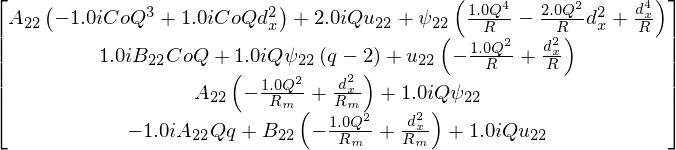

In [30]:
(L*V22).subs(dz, 1j*Q)

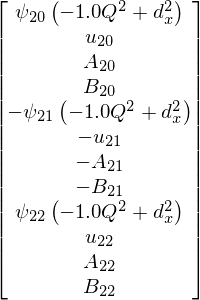

In [31]:
# wrong, but let's try it?
(Dbig*V22big).subs(dz, 1j*Q) - (Dbig*V21big).subs(dz, 1j*Q) + (Dbig*V20big).subs(dz, 1j*Q)

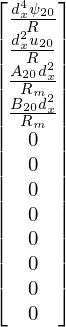

In [32]:
(Lbig*V20big).subs(dz, 0)

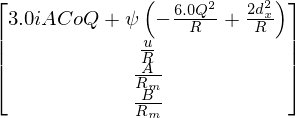

In [33]:
V11 = Matrix([psi, u, A, B])
V21 = Matrix([psi21, u21, A21, B21])
# L2twiddle
((L2 + 3*L3*dz + 6*L4*dz**2)*VT).subs(dz, 1j*Q)

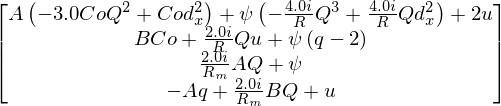

In [34]:
# L1twiddle
((L1 + 2*L2*dz + 3*L3*dz**2 + 4*L4*dz**3)*VT).subs(dz, 1j*Q)

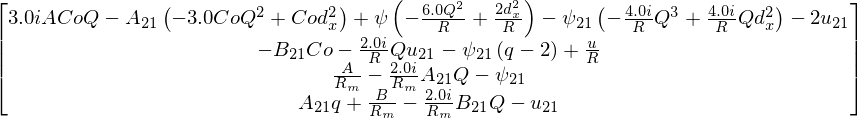

In [35]:
(((L2 + 3*L3*dz + 6*L4*dz**2)*V11).subs(dz, 1j*Q) - ((L1 + 2*L2*dz + 3*L3*dz**2 + 4*L4*dz**3)*V21).subs(dz, 1j*Q))

In [36]:
U11 = Matrix([0, 0, 0, 1])

In [37]:
U11.adjoint()*D*U11

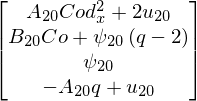

In [38]:
L1twiddle = (L1 + 2*L2*dz + 3*L3*dz**2 + 4*L4*dz**3)
(L1twiddle*V20).subs(dz, 0)

In [39]:
U20 = Matrix([0, u20, 0, 0])

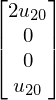

In [40]:
(L1twiddle*U20).subs(dz, 0)

In [41]:
L2twiddle = (L2 + 3*L3*dz + 6*L4*dz**2)

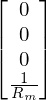

In [42]:
L2twiddle*U11

In [43]:
X = Matrix([[0, 0, Co*dx**2, 0],
            [0, 0, 0, Co],
            [1, 0, 0, 0],
            [0, 1, 0, 0]])

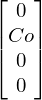

In [44]:
X*U11

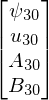

In [45]:
V30 = Matrix([psi30, u30, A30, B30])
V30

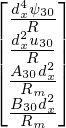

In [46]:
(L*V30).subs(dz, 0)


In [47]:
D*U11

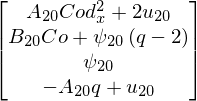

In [48]:
(L1twiddle*V20).subs(dz, 0)

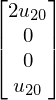

In [49]:
(L1twiddle*U20).subs(dz, 0)

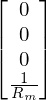

In [50]:
(L2*U11).subs(dz, 0)

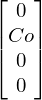

In [51]:
X*U11

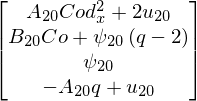

In [52]:
L1*V20

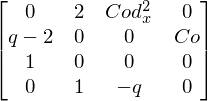

In [53]:
L1

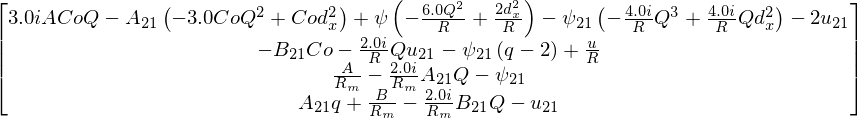

In [54]:
(L2twiddle*V11).subs(dz, 1j*Q) - (L1twiddle*V21).subs(dz, 1j*Q)

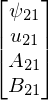

In [55]:
V21

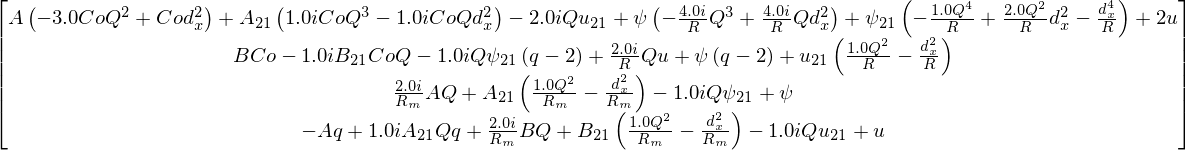

In [56]:
(-L*V21 + L1twiddle*V11).subs(dz, 1j*Q)

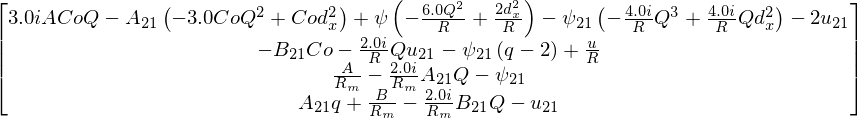

In [57]:
(L2twiddle*V11 - L1twiddle*V21).subs(dz, 1j*Q)

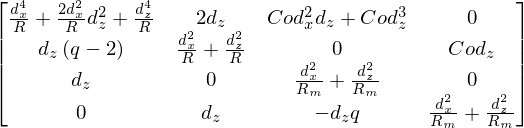

In [58]:
L

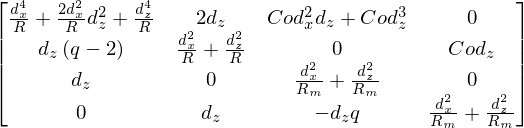

In [59]:
L = L0 + L1*dz + L2*dz**2 + L3*dz**3 + L4*dz**4
L

In [60]:
LT =  L.subs(dz, 1j*Q).adjoint()

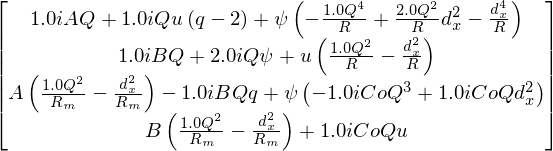

In [61]:
-LT*VT

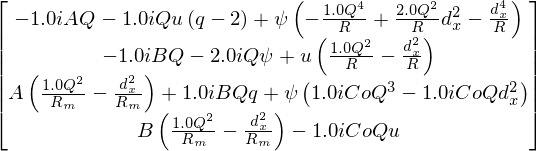

In [62]:
-1*L.adjoint().subs(dz, 1j*Q)*VT

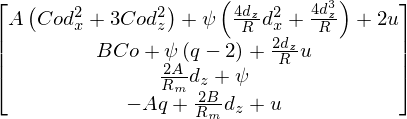

In [63]:
L1twiddle*VT

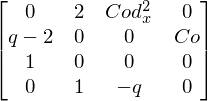

In [64]:
L1

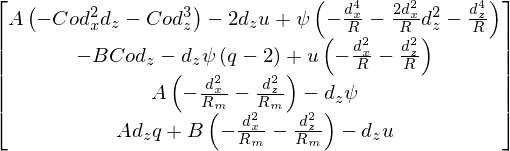

In [65]:
-L*VT

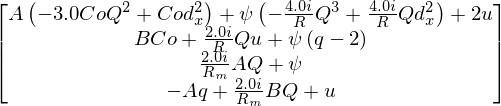

In [66]:
#V21
(L1twiddle*VT).subs(dz, 1j*Q)

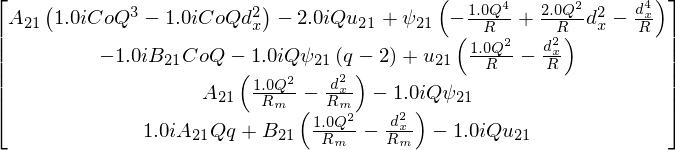

In [67]:
(-L*V21).subs(dz, 1j*Q)

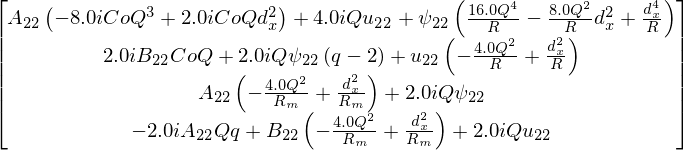

In [68]:
(L*V22).subs(dz, 1j*2*Q)

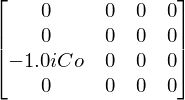

In [69]:
(L3.subs(Co, 1j*Co)).adjoint()

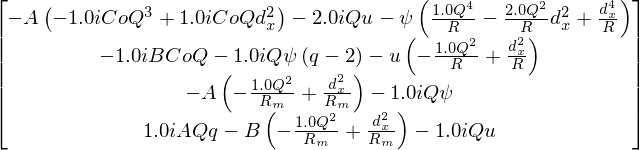

In [70]:
-(L*VT).subs(dz, 1j*Q)

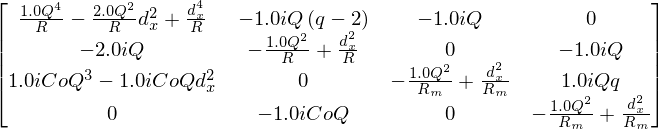

In [71]:
L.adjoint().subs(dz, -1j*Q)

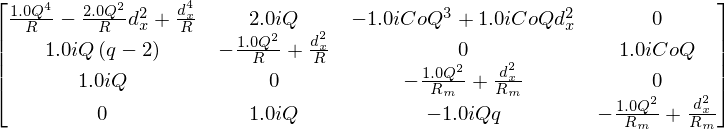

In [72]:
L.subs(dz, 1j*Q)

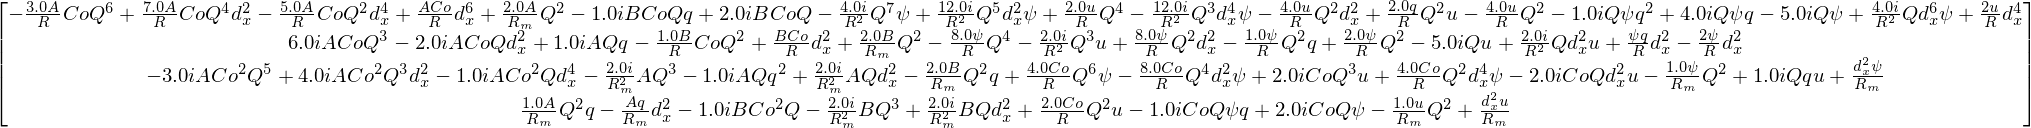

In [73]:
((LT*L1twiddle)*VT).subs(dz, 1j*Q).expand()

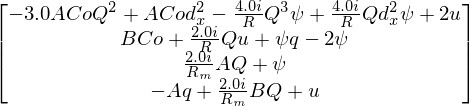

In [74]:
(L1twiddle*VT).subs(dz, 1j*Q).expand()

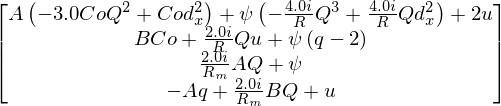

In [75]:
(L1twiddle.subs(dz, 1j*Q))*VT

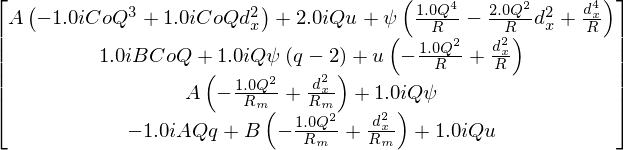

In [76]:
(L*VT).subs(dz, 1j*Q)

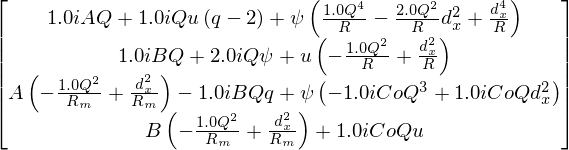

In [77]:
(L.adjoint()*VT).subs(dz, 1j*Q)

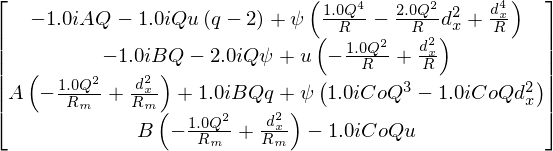

In [78]:
(((L).subs(dz, 1j*Q)).adjoint())*VT

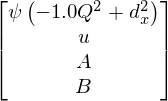

In [79]:
(D*VT).subs(dz, 1j*Q)

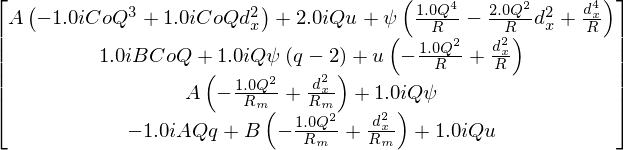

In [80]:
(L*VT).subs(dz, 1j*Q)

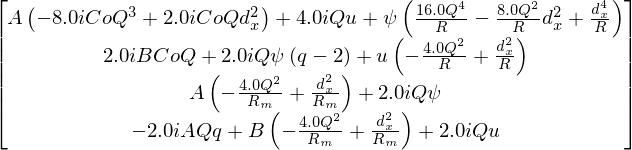

In [81]:
(L*VT).subs(dz, 1j*2*Q)

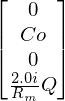

In [82]:
(L1twiddle*U11).subs(dz, 1j*Q)

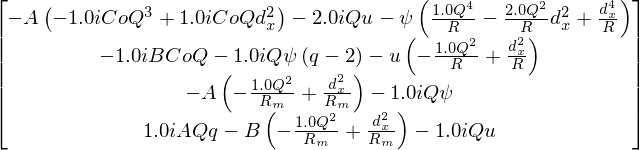

In [83]:
((L)*(VT*-1)).subs(dz, 1j*Q)

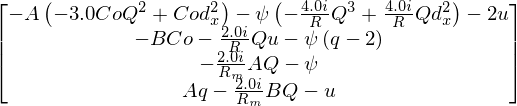

In [84]:
-1*((L1twiddle*VT).subs(dz, 1j*Q))

In [85]:
((dz + Q*dx)**4).expand()

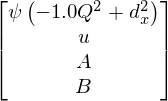

In [86]:
((D*VT).subs(dz, 1j*Q))

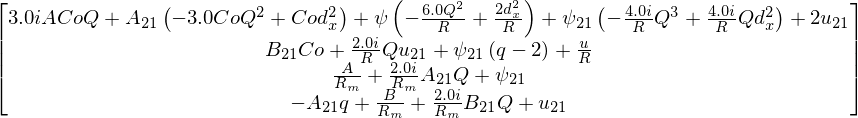

In [87]:
(L1twiddle*V21 + L2twiddle*V11).subs(dz, 1j*Q)

In [88]:
G = Matrix([[0, 0, Co*dx**2, 0],
            [0, 0, 0, Co],
            [1, 0, 0, 0],
            [0, 1, 0, 0]])

In [89]:
Gtwiddle = -G*dz - L3*dz**3

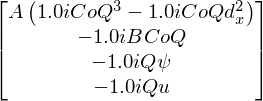

In [90]:
(Gtwiddle*V11).subs(dz, 1j*Q)

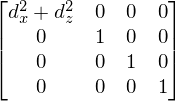

In [91]:
D

In [96]:
D*(VT.conjugate)

TypeError: unsupported operand type(s) for *: 'Add' and 'instancemethod'